In [10]:
import os
import sys
import numpy as np
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
import scipy.ndimage as nd

# Reading in images

## images are actually arrays of numbers

In [70]:
nd.imread("esb.jpg")

array([[[ 47,  77, 103],
        [ 46,  76, 102],
        [ 44,  74, 100],
        ..., 
        [ 51, 104, 144],
        [ 52, 105, 145],
        [ 53, 106, 148]],

       [[ 41,  71,  97],
        [ 39,  69,  95],
        [ 37,  67,  93],
        ..., 
        [ 44,  97, 137],
        [ 45,  98, 138],
        [ 45,  98, 138]],

       [[ 40,  70,  96],
        [ 38,  68,  94],
        [ 37,  67,  93],
        ..., 
        [ 43,  96, 136],
        [ 44,  97, 137],
        [ 43,  96, 136]],

       ..., 
       [[ 39,  77,  88],
        [ 40,  76,  90],
        [ 41,  74,  89],
        ..., 
        [ 25,  53,  65],
        [ 25,  53,  65],
        [ 25,  53,  65]],

       [[ 41,  79,  90],
        [ 42,  78,  92],
        [ 42,  75,  90],
        ..., 
        [ 28,  54,  67],
        [ 27,  53,  66],
        [ 27,  53,  66]],

       [[ 45,  83,  94],
        [ 45,  81,  95],
        [ 46,  79,  94],
        ..., 
        [ 33,  59,  72],
        [ 32,  58,  71],
        [ 32,  58,

## Conveying colors: each color channel is a 2D array

In [71]:
fiImg = nd.imread("esb.jpg")
fiImg.shape

(652, 236, 3)

the first axis is the rows (1008 rows in this image), the second axis the columns (672 columns) the third axis is the "channels", i.e. the color components. Here we have an RGB image: 

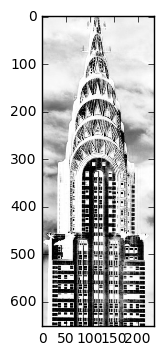

In [72]:
pl.imshow(fiImg[:,:,0], cmap="Greys")

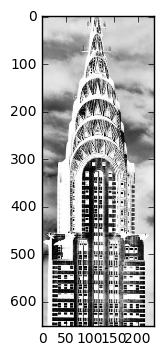

In [73]:
pl.imshow(fiImg[:,:,1], cmap="Greys")

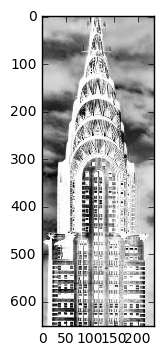

In [74]:
pl.imshow(fiImg[:,:,2], cmap="Greys")

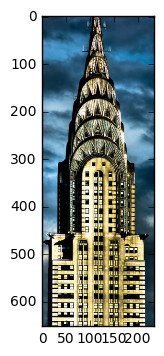

In [75]:
pl.imshow(fiImg)

In [76]:
print(fiImg.mean(0).mean(0))


[  92.53650437  109.17090829  104.89339841]


## Appropriate data types for image arrays

In [77]:
print(fiImg.max(0).max(0))
print(fiImg.min(0).min(0))

[255 255 255]
[0 0 0]


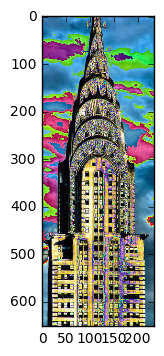

In [78]:
imshow(fiImg*2)

In [79]:
print((fiImg*2).max(0).max(0))
print((fiImg*2).min(0).min(0))

[254 254 254]
[0 0 0]


In [80]:
fiImg.dtype


dtype('uint8')

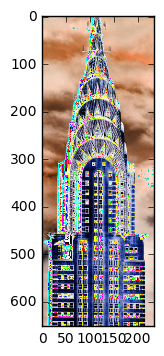

In [81]:
imshow(fiImg.astype(float))

# Image analysis and manipulation

## Finding edges

In [82]:
sx = nd.filters.sobel(fiImg, 0)
sy = nd.filters.sobel(fiImg, 1)
mag = np.hypot(sx, sy)

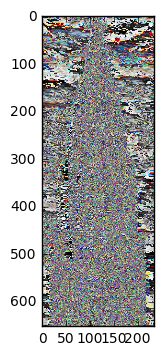

In [83]:
imshow(sx)

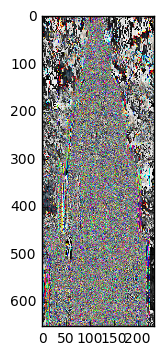

In [84]:
imshow(sy)

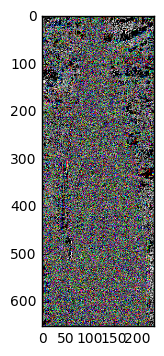

In [85]:
imshow(mag)

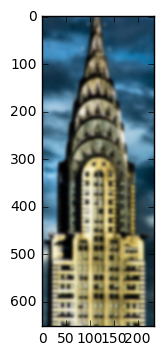

In [89]:
smoothfiImg = nd.filters.gaussian_filter(fiImg, [3, 3, 0])

imshow(smoothfiImg.astype(np.uint8))

In [90]:
smoothfiImg.shape

(652, 236, 3)

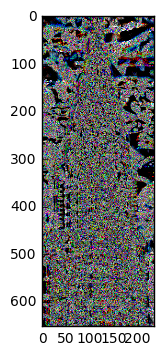

In [91]:
sx = nd.filters.sobel(smoothfiImg, 0)
sy = nd.filters.sobel(smoothfiImg, 1)
mag = np.hypot(sx, sy)
imshow(mag)

## Extracting areas from an image

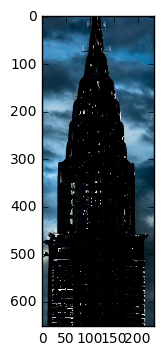

In [100]:
skyfiImg = fiImg.copy()
skyfiImg[(fiImg[:,:,2] < fiImg[:,:,1]) * (fiImg[:,:,2] < fiImg[:,:,0])] = 0
imshow(skyfiImg)

## reading raw files. 
often scientific images are saves as raw files. Then there is no header, and no way for python to know how many rows, columns, channels, or even the data format, which is needed to know who to read numbers in! Set the data format to np.uint8, and then look for the image size. Find the size of the 2D array by trial and error.

In [114]:
#f = open("tmp.raw","w")
#f.write(skyfiImg.tostring())
#f.close()


In [128]:
np.fromfile("tmp.raw", np.uint8).size

461616

In [129]:
np.fromfile("tmp.raw", np.uint8).size/3

153872

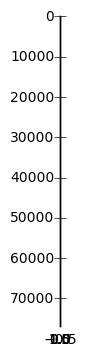

In [130]:
imshow(np.fromfile("tmp.raw", np.uint8).reshape(153872/2,2,3))

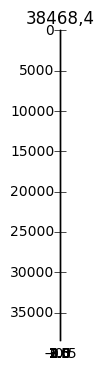

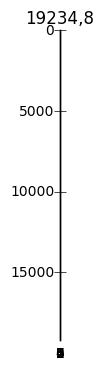

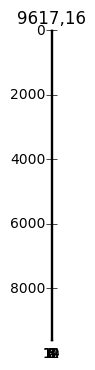

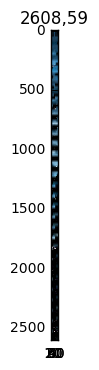

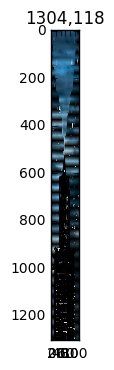

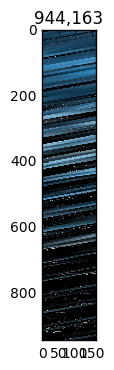

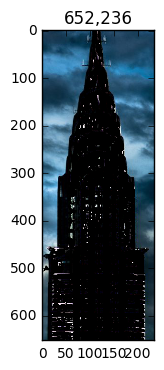

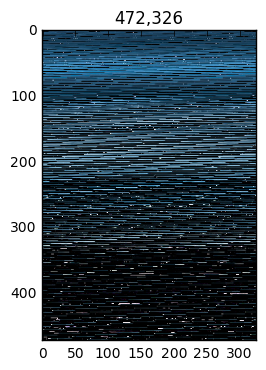

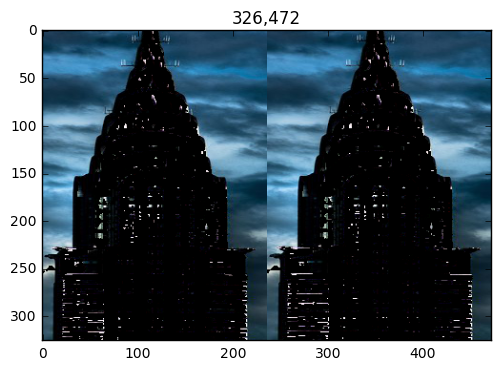

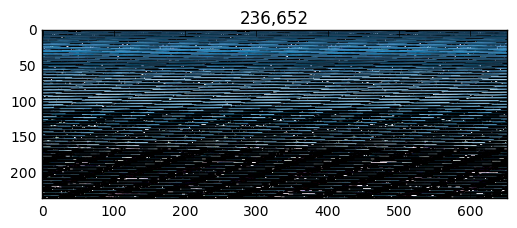

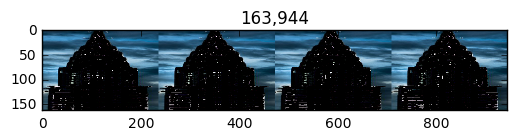

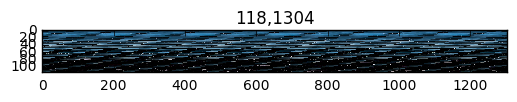

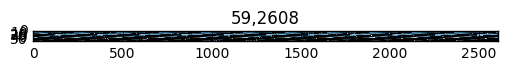

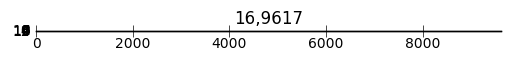

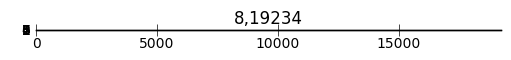

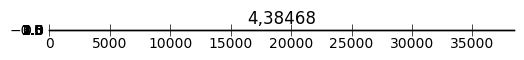

In [136]:
for i in range(3,153872/3):
    if (153872 % i) == 0:
        pl.figure()
        imshow(np.fromfile("tmp.raw", np.uint8).reshape(153872/i,i,3))
        pl.title("%d,%d"%(153872/i, i))

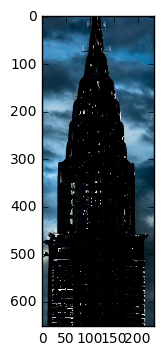

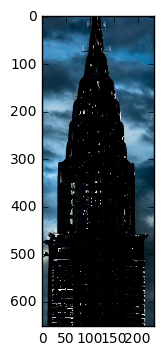

In [137]:
imshow(np.fromfile("tmp.raw", np.uint8).reshape([652,236,3]))
pl.figure()
imshow(np.fromfile("tmp.raw", np.uint8).reshape(skyfiImg.shape))

In [194]:
def sobelall(imfile):
    pl.figure()
    imshow(imread(imfile))
    pl.figure()
    sklimg = nd.filters.gaussian_filter(imread(imfile), [5,5,0])
    sx = nd.filters.sobel(sklimg, 0)
    pl.figure()
    imshow(sx.mean(2), cmap="Greys")
    sy = nd.filters.sobel(sklimg, 1)
    pl.figure()
    imshow(sy.mean(2), cmap="Greys")
    mag = (sx+sy).astype(float)
    mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)
    pl.figure()
    imshow(mag.astype(np.uint8).mean(2), cmap="Greys")
    tmp = mag.astype(np.uint8).mean(2)
    tmp[tmp < 100] = 0
    tmp[tmp > 100] = 255
    pl.figure()
    imshow(tmp, cmap="Greys")

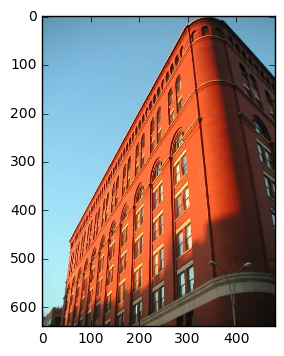

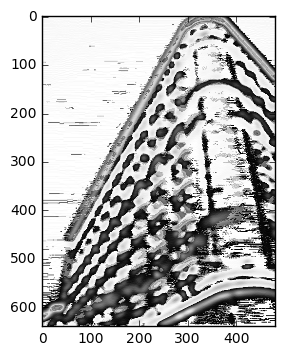

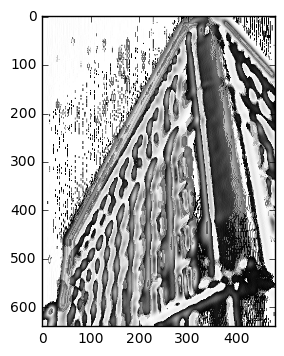

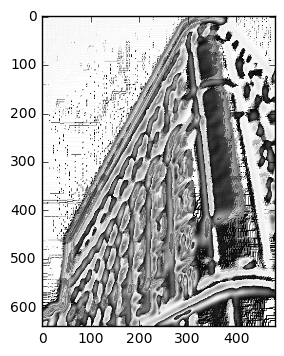

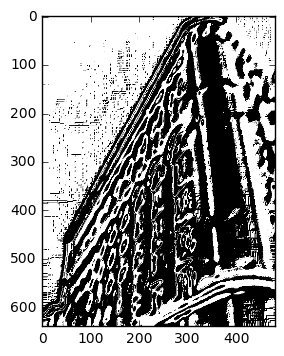

In [196]:
imfile = 'Pict0296.jpg'
sobelall(imfile)

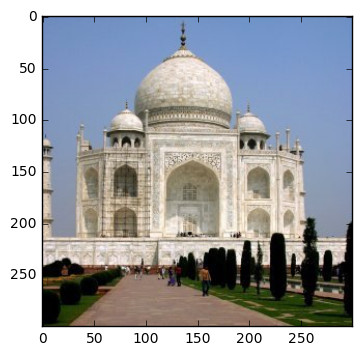

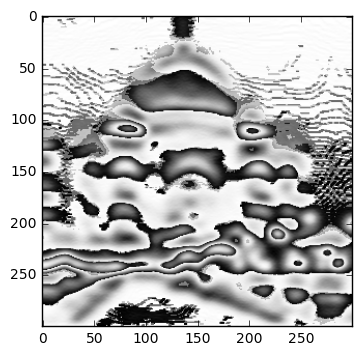

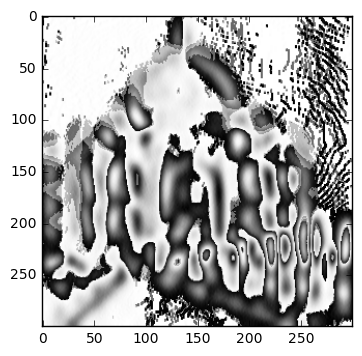

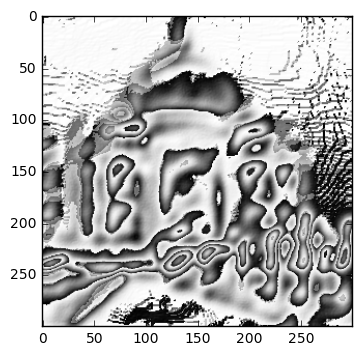

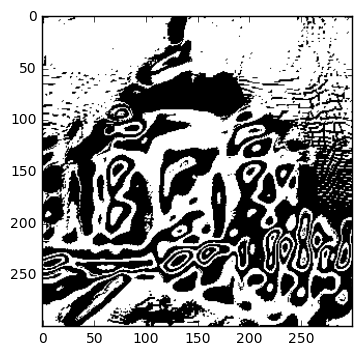

In [195]:
imfile = 'taj_orig.jpg'
sobelall(imfile)

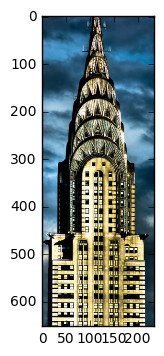

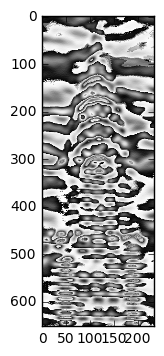

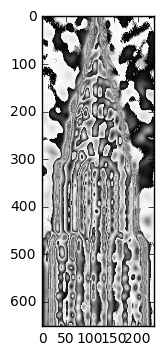

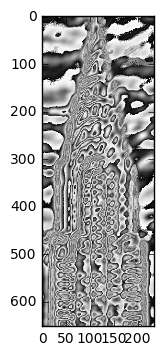

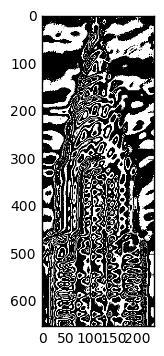

In [197]:
imfile = "esb.jpg"
sobelall(imfile)

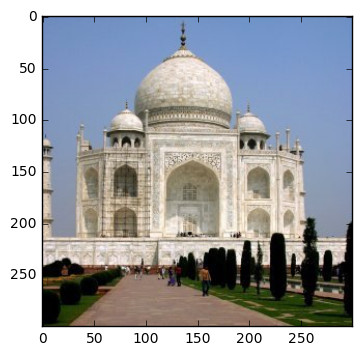

In [142]:
taj = imread("taj_orig.jpg")
imshow(taj)

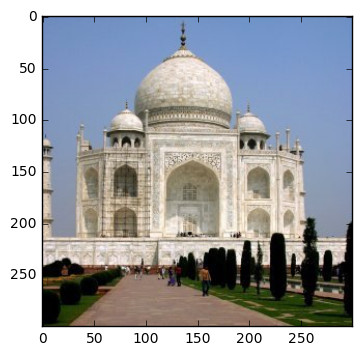

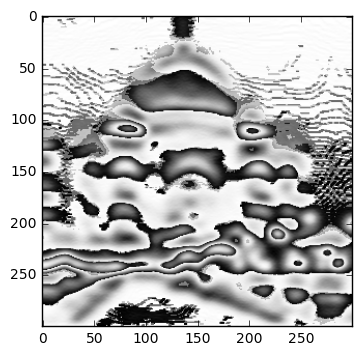

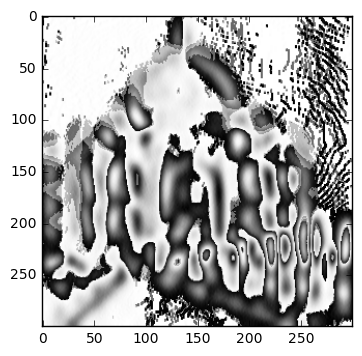

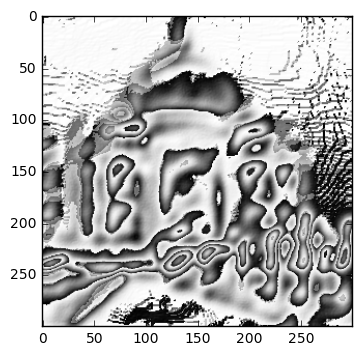

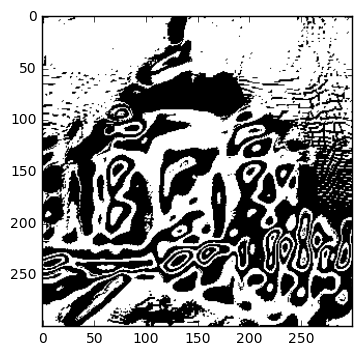

In [198]:
sobelall('taj_orig.jpg')

In [147]:
nd.filters.sobel?

In [155]:
import opencv



ImportError: No module named opencv

In [171]:
nd.filters.sobel(imread("image074.jpg")[50:-20,20:-20,:],0).dtype






dtype('uint8')